### Download necessary packages

In [189]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path

### Create region polygons

In [190]:
import re
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})


lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [191]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))


In [192]:
from shapely import geometry

poly_w = geometry.Polygon(df_w.values)
poly_plottable_w = geometry.Polygon(df_w_plottable.values)

polygon_w_plottable = Polygon(df_w_plottable.values)
print(polygon_w_plottable)

POLYGON ((-69.5 40, -68 40.3, -67.5 40.4, -67 40.6, -66.5 40.8, -66 41.45, -65.7 41.8, -66 42.1, -67 42.1, -67.5 42.1, -68 41.8, -69 41.1, -69.5 41, -69.5 40))


In [193]:
# print(type(df_w_plottable))

In [194]:
print(poly_w)
print(poly_plottable_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))
POLYGON ((-69.5 40, -68 40.3, -67.5 40.4, -67 40.6, -66.5 40.8, -66 41.45, -65.7 41.8, -66 42.1, -67 42.1, -67.5 42.1, -68 41.8, -69 41.1, -69.5 41, -69.5 40))


In [195]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})

lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']


lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})

In [196]:
# print(df_v_plottable)

In [197]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


In [198]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})

In [199]:
# print(df_x_plottable)

In [200]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


In [201]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})

In [202]:
# print(df_y_plottable)

In [203]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


In [204]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})

In [205]:
# print(df_t_plottable)

In [206]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((70.5 42.2, 70 42, 69 41.1, 68 41.8, 68 44.2, 69 43.9, 70 43.7, 70.5 43, 70.5 42.2))


### General Spatial Plotting

In [207]:
finaldepth = []; finallat = [];finallon = []
zi_listofarrays = []
for year in range(1978,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)] 
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []   
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])   
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        counterii.append(ii)
                    break  

    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
#     grid = path_new.contains_points(points) ###
#     grid = grid.reshape((22,22)) ###
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((44,44)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    zi_listofarrays.append(zi)

In [208]:
print(len(zi_listofarrays))

42


In [209]:
newmeangridnew = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25],zi_listofarrays[26],
                          zi_listofarrays[27],zi_listofarrays[28],zi_listofarrays[29],
                          zi_listofarrays[30],zi_listofarrays[31],zi_listofarrays[32],
                          zi_listofarrays[33],zi_listofarrays[34],zi_listofarrays[35],
                          zi_listofarrays[36],zi_listofarrays[37],zi_listofarrays[38],
                          zi_listofarrays[39],zi_listofarrays[40],zi_listofarrays[41]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [210]:
print(newmeangridnew)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan 16.36204282 12.99320518         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan  8.24670164 11.6746463  18.05792826 18.4489606  14.9180985
          nan         nan         nan         nan         nan         nan
          nan         nan         

In [22]:
newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]

In [28]:
from matplotlib.path import Path

newlon = newlon 
newlat = newlat 
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)
nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)
x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

In [29]:
newmeangridnew.shape

(22, 22)

In [27]:
xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
grid = path_new.contains_points(points) ###
grid = grid.reshape((22,22)) ###
    
# zi = 'zi_{}'.format(year)
# zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((44,44)) ###
    
# newgridded = np.where(grid == False, np.nan, grid) ###
# newgriddednew = np.where(grid == 1., newmeangridnew, grid) ###
# newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
#     zi_listofarrays.append(zi)

In [212]:
print(grid.shape)

(22, 22)


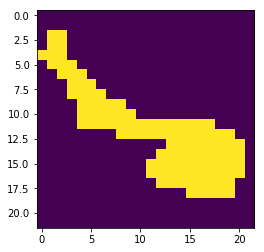

In [213]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid)

In [214]:
print(grid)

[[False False False False False False False False False False False False
  False False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [ True  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True  True False False False False False False False False
  False False False False False False False False False False]
 [False False  True  True  True False False False False False False False
  False False False False False False False False False False]
 [False False False  True  True  True Fal

In [215]:
griddednewlate = np.where(grid == True, newmeangridnew, grid)

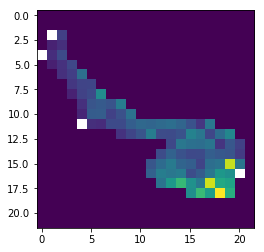

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlate)

In [217]:
griddednewlatelate = np.where(griddednewlate == np.nan, 0.0, griddednewlate)

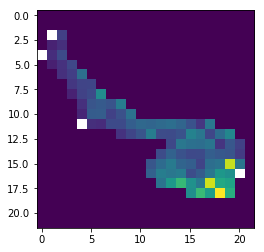

In [218]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlatelate)

In [219]:
b = np.where(np.isnan(griddednewlatelate), 0, griddednewlatelate)

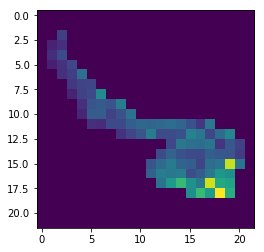

In [220]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(b)

In [221]:
print(b)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         16.36204282  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          8.24670164 11.6746463   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0

In [36]:
newgridded = np.where(grid == False, np.nan, grid)

In [37]:
print(newgridded)

<function grid at 0x10e37bd08>


TypeError: Image data cannot be converted to float

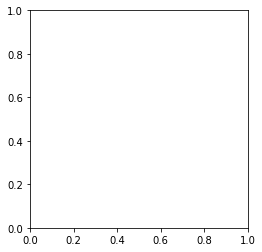

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newgridded)

In [39]:
newgriddednew = np.where(grid == 1., newmeangridnew, grid)

TypeError: Image data cannot be converted to float

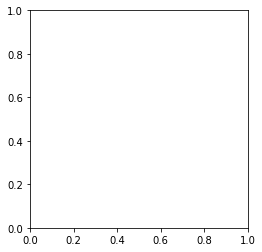

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newgriddednew)

In [41]:
print(newgriddednew)

[[<function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>]
 [<function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <function grid at 0x10e37bd08>
  <function grid at 0x10e37bd08> <funct

In [32]:
newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew)

In [39]:
newgriddedlast2 = np.where(newgriddednew == 0., np.nan, newgriddedlast)

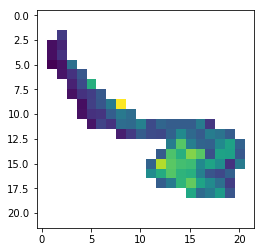

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newgriddedlast2)

In [51]:
print(type(newgriddedlast2))

<class 'numpy.ndarray'>


In [46]:
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

In [47]:
print(len(xi))

22


In [37]:
print(newgriddedlast.shape)

(22, 22)


TypeError: float() argument must be a string or a number, not 'function'

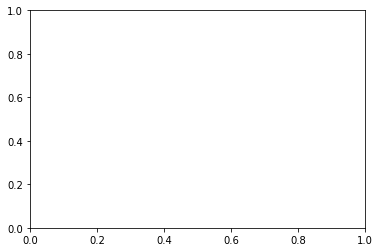

In [45]:
plt.contourf(xi,yi,newgriddednew,np.arange(0, 185, 1),cmap = 'ocean_r')

In [121]:
newstdgridnew = np.nanstd([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25],zi_listofarrays[26],
                          zi_listofarrays[27],zi_listofarrays[28],zi_listofarrays[29],
                          zi_listofarrays[30],zi_listofarrays[31],zi_listofarrays[32],
                          zi_listofarrays[33],zi_listofarrays[34],zi_listofarrays[35],
                          zi_listofarrays[36],zi_listofarrays[37],zi_listofarrays[38],
                          zi_listofarrays[39],zi_listofarrays[40],zi_listofarrays[41],zi_listofarrays[42]],axis = 0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


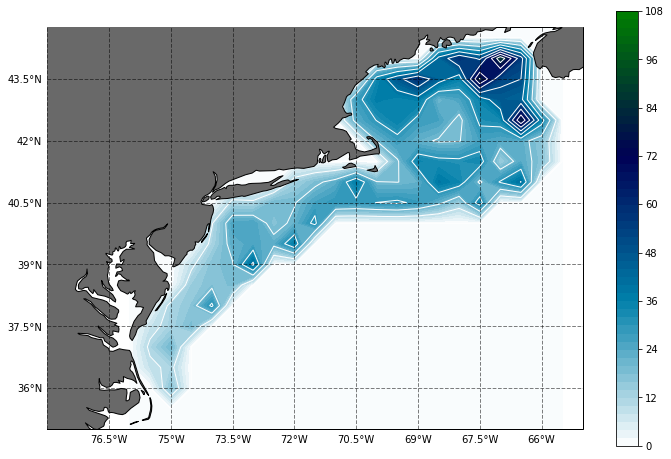

In [223]:
# from matplotlib.pyplot import * ; import cartopy.feature as cfeature

# plt.figure(figsize=(12, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())

from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())

# plt.plot(newgriddedlast2)



gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cf = plt.contourf(xi,yi,b,np.arange(0, 110,2), cmap = 'ocean_r')
ax.contour(xi, yi, b, levels=9, linewidths=1,colors='white',zorder=5,)

# cf = plt.contourf(xi,yi,grid,np.arange(0, 185, 5),cmap = 'ocean_r')
# plt.contour(xi, yi, newmeangridnew, levels=5, linewidths=1,colors='white')
# cf = plt.contourf(xi,yi,newgriddednew,np.arange(0, 95, 5),cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,newgridded)
# ax.contour(xi, yi, newgriddednew, levels=9, linewidths=1,colors='white',zorder=5,)
# plt.contour(xi, yi, newgridded, levels=5, linewidths=1,colors='white')
# plt.scatter(val_lon_list[:99], val_lat_list[:99], marker='o', c='red',zorder = 20)
# plt.plot(val_lon_list[:99], val_lat_list[:99])

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)

plt.savefig('NEFSC.png')

plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.imshow(0)

In [211]:
import numpy as np
from matplotlib.path import Path

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

# poly_verts = df_w_plottable.values 

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

# print(df_w_plottable.values )

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

# full_numpyarray = poly_verts_w.append(poly_verts_v,poly_verts_x,poly_verts_y,poly_verts_t)

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

# path = Path(poly_verts)
path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

# grid = path.contains_points(points)
# grid = path_w.contains_points(points) 
# grid = path_full.contains_points(points) 
grid = path_new.contains_points(points) 

# grid = path_w.contains_points(points) or path_v.contains_points(points) or path_x.contains_points(points) or path_y.contains_points(points) or path_t.contains_points(points)

grid = grid.reshape((22,22))

# print(grid)

print(grid.shape)

(22, 22)


In [24]:
new = zi_listofarrays[0]
for i in zi:
    print(i)
# for i in zi:
#     print(i)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[        nan         nan 23.67280507 26.20997344         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
[        nan 10.67999048 17.79754061 63.86614256 18.16055574         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
[         nan  12.09257154  35.68653456 193.58822111  75.23000953
  32.29486109  22.49630851          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan   

In [480]:
def outline_to_mask(line, x, y):
    """Create mask from outline contour

    Parameters
    ----------
    line: array-like (N, 2)
    x, y: 1-D grid coordinates (input for meshgrid)

    Returns
    -------
    mask : 2-D boolean array (True inside)
    """
    import matplotlib.path as mplp
    mpath = mplp.Path(line)
    X, Y = np.meshgrid(x, y)
    points = np.array((X.flatten(), Y.flatten())).T
    mask = mpath.contains_points(points).reshape(X.shape)
    return mask

In [139]:
import numpy as np
from matplotlib.path import Path

# nx = np.arange(-76*100,-65*100,25)
# ny = np.arange(35*100,46*100,25)

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

# poly_verts = df_w_plottable.values 

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

# print(df_w_plottable.values )

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

# full_numpyarray = poly_verts_w.append(poly_verts_v,poly_verts_x,poly_verts_y,poly_verts_t)

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

# path = Path(poly_verts)
path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

# grid = path.contains_points(points)
# grid = path_w.contains_points(points) 
# grid = path_full.contains_points(points) 
grid = path_new.contains_points(points) 

# grid = path_w.contains_points(points) or path_v.contains_points(points) or path_x.contains_points(points) or path_y.contains_points(points) or path_t.contains_points(points)

grid = grid.reshape((22,22))

print(grid)

[[False False False False False False False False False False False False
  False False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True False False False False False False False False False
  False False False False False False False False False False]
 [ True  True  True False False False False False False False False False
  False False False False False False False False False False]
 [False  True  True  True False False False False False False False False
  False False False False False False False False False False]
 [False False  True  True  True False False False False False False False
  False False False False False False False False False False]
 [False False False  True  True  True Fal

In [140]:
print(grid.shape)

(22, 22)


In [73]:
print(type(zi[0][1]))

<class 'numpy.float64'>


In [483]:
print(grid)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


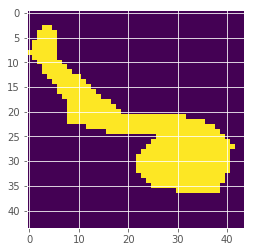

In [745]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid)

In [64]:
newgridded = np.where(grid == False, np.nan, grid)

newgriddednew = np.where(grid == 1., zi, grid)

# print(newgridded)
# latest = []
# for i in newgridded:
#     for a in zi:
# #         print(i)
# #         print(a)
#         for b in a:
#             for ii in i:
#                 ii = b
#             print(i)
# #         print(i)
# #             for ii in i:
# #                 ii = zi[a][b]

In [65]:
print(newgriddednew)

[[<function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>]
 [<function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <function grid at 0x111a57d08>
  <function grid at 0x111a57d08> <funct

In [66]:
newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew)

In [490]:
print(newgriddedlast)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


TypeError: float() argument must be a string or a number, not 'function'

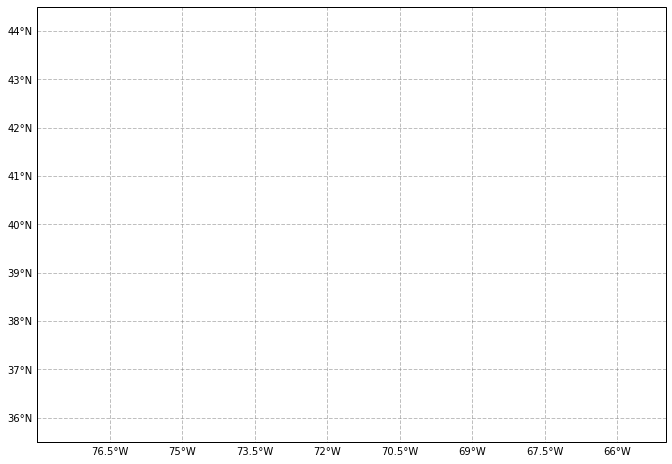

In [67]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cf = plt.contourf(xi,yi,newgridded,cmap = 'ocean_r')
# plt.contour(xi, yi, zi, levels=5, linewidths=1,colors='white')

plot(x_w,y_w,color='red', linewidth = 2, linestyle='-',zorder = 15)
plot(x_v,y_v,color='red', linewidth = 2, linestyle='-',zorder = 15)
plot(x_x,y_x,color='red', linewidth = 2, linestyle='-',zorder = 15)
plot(x_y,y_y,color='red', linewidth = 2, linestyle='-',zorder = 15)
plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',zorder = 15)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)

plt.show()

TypeError: Length of x must be number of columns in z.

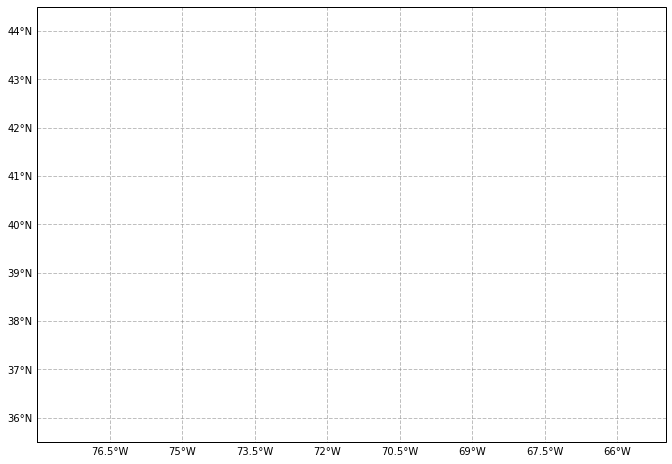

In [438]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# cf = plt.contourf(xi,yi,newgriddednew,cmap = 'ocean_r')
plt.contour(xi, yi, newgriddedlast, levels=5, linewidths=1,colors='white')
cf = plt.contourf(xi,yi,newgriddedlast,cmap = 'ocean_r')

# plot(x_w,y_w,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_v,y_v,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_x,y_x,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_y,y_y,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',zorder = 15)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)

plt.show()

In [ ]:
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    
    flat_lon[:] = [x *-1*-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.25)
    yi = np.arange(35,46,0.25)
    xi,yi = np.meshgrid(xi,yi)
    
    
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi_listofarrays.append(zi)

In [97]:
print(zi)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [98]:
print(len(zi_listofarrays))

1


In [130]:
flattenedzi = zi.flatten()

In [135]:
print(flattenedzi[0])

nan


In [99]:
print(zi_listofarrays[0].shape)
print(zi.shape)

(44, 44)
(44, 44)


In [100]:
stacked = np.dstack([xi,yi])

In [101]:
reshaped = stacked.reshape(1936,2)

In [102]:
print(reshaped)

[[-76.    35.  ]
 [-75.75  35.  ]
 [-75.5   35.  ]
 ...
 [-65.75  45.75]
 [-65.5   45.75]
 [-65.25  45.75]]


In [136]:
output = []
for i in reshaped:
    point = Point(i)
    if polygon_w.contains(point) == True:
        output.append(point)
        print(i)
#     if Point(i).within(polygon_w or polygon_y or polygon_t or polygon_x):
#         output.append(i)

# output = np.array(output)
# x, y = output[:, 0], output[:, 1]

In [1747]:
finalfinal = []; finaldepth = []; finallat = [];finallon = []
zi_listofarrays = []; ci_listofarrays = []
for year in range(2019,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)] 
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []   
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])   
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        counterii.append(ii)
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        counterii.append(ii)
                    break  
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth)
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    
    flat_lon[:] = [x *-1 for x in flat_lon]
#     # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)    
    listofones = []
    for x in range(len(name)):
        listofones.append(2)
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat,listofones)),columns = ['depth','lon','lat','count'])
    
    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    c = 'c_{}'.format(year)
    c = name['count']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
    
    newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
    newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
    newpath = list(zip(newlon,newlat))
    newpd = pd.DataFrame(newpath, columns=['lon','lat'])

#     path_new = Path(newpath) #
    
    xi,yi = np.meshgrid(xi,yi)
#     xi, yi = xi.flatten(), yi.flatten() #
    
    grid = path_new.contains_points(points) ##
    grid = grid.reshape((22,22)) ##
    
    ci = 'ci_{}'.format(year)
    ci = griddata((x,y),c,(xi,yi),method='linear')
    ci = ci.reshape((22,22)) ##
    
    newgridded = np.where(grid == False, 0, grid) #np.nan ##
    newgriddednew = np.where(grid == 1., ci, grid)
    newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew)
    
    ci_listofarrays.append(newgriddedlast)
#     ci_listofarrays.append(ci)
#     grid = 'grid_{}'.format(year)
#     grid = ci

#     zi = 'zi_{}'.format(year)
#     zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((44,44))
    
#     newgridded = np.where(grid == False, np.nan, grid)
#     newgriddednew = np.where(grid == 1., zi, grid)
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew)
    
#     zi_listofarrays.append(newgriddedlast)

ValueError: No points given

In [1592]:
grid1977 = ci_listofarrays[0]

In [1594]:
grid1978 = ci_listofarrays[0]

In [1596]:
grid1979 = ci_listofarrays[0]

In [1598]:
grid1980 = ci_listofarrays[0]

In [1600]:
grid1981 = ci_listofarrays[0]

In [1602]:
grid1982 = ci_listofarrays[0]

In [1604]:
grid1983 = ci_listofarrays[0]

In [1606]:
grid1984 = ci_listofarrays[0]

In [1608]:
grid1985 = ci_listofarrays[0]

In [1610]:
grid1986 = ci_listofarrays[0]

In [862]:
grid2012 = ci_listofarrays[0]

In [1614]:
grid1988 = ci_listofarrays[0]

In [1612]:
grid1987 = ci_listofarrays[0]

In [1616]:
grid1989 = ci_listofarrays[0]

In [1618]:
grid1990 = ci_listofarrays[0]

In [1620]:
grid1991 = ci_listofarrays[0]

In [1622]:
grid1992 = ci_listofarrays[0]

In [1624]:
grid1993 = ci_listofarrays[0]

In [1626]:
grid1994 = ci_listofarrays[0]

In [1628]:
grid1995 = ci_listofarrays[0]

In [1630]:
grid1996 = ci_listofarrays[0]

In [1632]:
grid1997 = ci_listofarrays[0]

In [1634]:
grid1998 = ci_listofarrays[0]

In [1636]:
grid1999 = ci_listofarrays[0]

In [1638]:
grid2000 = ci_listofarrays[0]

In [1640]:
grid2001 = ci_listofarrays[0]

In [1642]:
grid2002 = ci_listofarrays[0]

In [1644]:
grid2003 = ci_listofarrays[0]

In [1646]:
grid2004 = ci_listofarrays[0]

In [1648]:
grid2005 = ci_listofarrays[0]

In [1650]:
grid2006 = ci_listofarrays[0]

In [1652]:
grid2007 = ci_listofarrays[0]

In [1654]:
grid2008 = ci_listofarrays[0]

In [1656]:
grid2009 = ci_listofarrays[0]

In [1658]:
grid2010 = ci_listofarrays[0]

In [1660]:
grid2011 = ci_listofarrays[0]

In [1662]:
grid2012 = ci_listofarrays[0]

In [1664]:
grid2013 = ci_listofarrays[0]

In [1572]:
# grid2014 = ci_listofarrays[0]

In [1574]:
# grid2015 = ci_listofarrays[0]

In [1576]:
# grid2016 = ci_listofarrays[0]

In [1669]:
grid2017 = ci_listofarrays[0]

In [1580]:
# grid2018 = ci_listofarrays[0]

In [1582]:
# grid2019 = ci_listofarrays[0]

In [1672]:
gridded = np.nansum([grid1977,grid1978,grid1979,grid1980,grid1981,grid1982,grid1983,grid1984,grid1985,grid1986,grid1987,grid1988,grid1989,grid1990,grid1991,grid1992,grid1993,grid1994,grid1995,grid1996,grid1997,grid1998,grid1999,grid2000,grid2001,grid2002,grid2003,grid2004,grid2005,grid2006,grid2007,grid2008,grid2009,grid2010,grid2011,grid2012,grid2013,grid2017],axis=0)


In [1673]:
# gridded = np.nansum([ci_listofarrays[0],ci_listofarrays[1],ci_listofarrays[2],ci_listofarrays[3]],axis=0)

In [1674]:
print(gridded.shape)

(22, 22)


In [1675]:
print(gridded.shape)

newgridded = np.where(gridded == 0., np.nan, gridded) #np.nan

(22, 22)


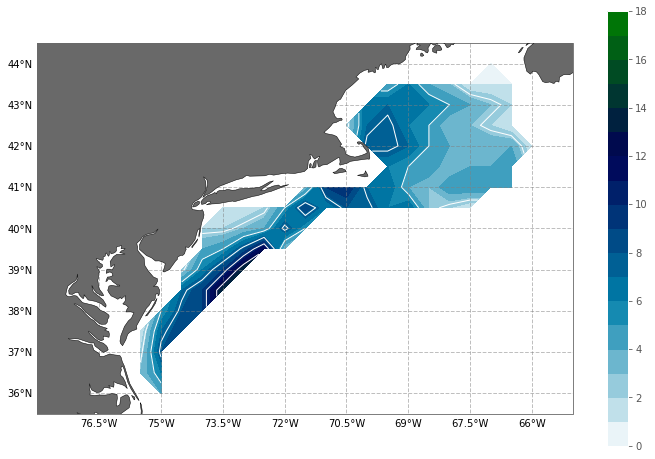

In [1676]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# cf = plt.contourf(xi,yi,newgriddednew,cmap = 'ocean_r')
plt.contour(xi, yi, newgridded/2, levels=5, linewidths=1,colors='white')
cf = plt.contourf(xi,yi,newgridded/2,np.arange(0,19,1),cmap = 'ocean_r')

# plt.contour(xi, yi, ci_listofarrays[0], levels=5, linewidths=1,colors='white')
# cf = plt.contourf(xi,yi,ci_listofarrays[0],cmap = 'ocean_r')

# plot(x_w,y_w,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_v,y_v,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_x,y_x,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_y,y_y,color='red', linewidth = 2, linestyle='-',zorder = 15)
# plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',zorder = 15)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)

plt.show()

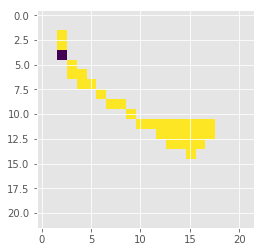

In [1237]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ci_listofarrays[0])

In [664]:
listofones = []
for x in range(len(name)):
    listofones.append(1)
# print(listofones)


name['count'] = listofones
print(name)

    depth      lon      lat  count
0    35.0 -70.3900  40.8267      1
1    10.0 -70.0233  40.3850      1
2    56.0 -70.4367  40.3700      1
3     9.0 -70.4033  40.1683      1
4    41.0 -70.0367  40.0300      1
5    51.0 -69.8033  40.1950      1
6    62.0 -69.4367  40.2433      1
7    37.0 -69.6483  40.4367      1
8    45.0 -69.8300  40.5650      1
9    26.0 -69.7883  40.9483      1
10   66.0 -69.2150  40.3667      1
11   38.0 -69.0367  40.2167      1
12   49.0 -68.7883  40.3983      1
13   30.0 -69.8717  41.9117      1
14   24.0 -70.0150  42.0800      1
15   35.0 -70.4667  42.3850      1
16   53.0 -70.1367  42.5533      1
17   73.0 -69.9617  42.3183      1
18   37.0 -69.7183  42.0550      1
19   71.0 -69.5017  41.9200      1


In [843]:
gridded = np.nansum([ci_listofarrays[0] + ci_listofarrays[1] + ci_listofarrays[2] + ci_listofarrays[3] + ci_listofarrays[4] + ci_listofarrays[5] + ci_listofarrays[6] + ci_listofarrays[7] +ci_listofarrays[8] +ci_listofarrays[9] +ci_listofarrays[10] +ci_listofarrays[11] +ci_listofarrays[12] +ci_listofarrays[13] +ci_listofarrays[14] +ci_listofarrays[15]+ci_listofarrays[16]+ci_listofarrays[17]+ci_listofarrays[18]+ci_listofarrays[19]+ci_listofarrays[20]+ci_listofarrays[21]+ci_listofarrays[22]+ci_listofarrays[23]+ci_listofarrays[24]+ci_listofarrays[25]+ci_listofarrays[26]+ci_listofarrays[27]+ci_listofarrays[28]+ci_listofarrays[29]+ci_listofarrays[30]+ci_listofarrays[31]+ci_listofarrays[32]+ci_listofarrays[33]+ci_listofarrays[34]+ci_listofarrays[35]+ci_listofarrays[36]+ci_listofarrays[37]+ci_listofarrays[38]+ci_listofarrays[39]+ci_listofarrays[40]+ci_listofarrays[41]+ci_listofarrays[42]],axis=0)




In [649]:
print(type(finaldepth))
# print(finallat)
#     finallat.append(inlat)
#     finallon.append(inlon)

<class 'list'>


In [1746]:
import itertools
flat=itertools.chain.from_iterable(finaldepth)
fulldepthmeas = list(flat)

In [1744]:
print(len(fulldepthmeas))

5106


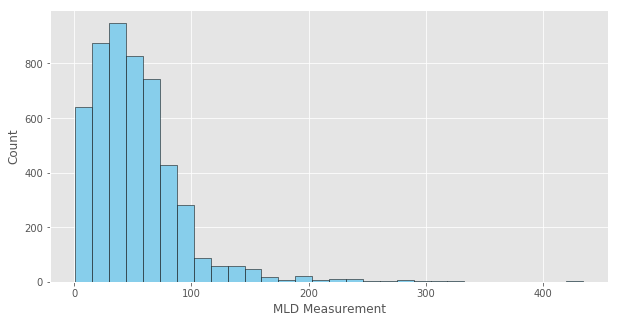

In [1745]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.hist(fulldepthmeas, density=False, bins=30,color = "skyblue",ec="black")  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('MLD Measurement');

In [743]:
print(path_new)

Path(array([[-69.5 ,  40.  ],
       [-68.  ,  40.3 ],
       [-67.5 ,  40.4 ],
       [-67.  ,  40.6 ],
       [-66.5 ,  40.8 ],
       [-66.  ,  41.45],
       [-65.7 ,  41.8 ],
       [-66.  ,  42.1 ],
       [-66.  ,  43.  ],
       [-66.5 ,  44.2 ],
       [-67.  ,  44.2 ],
       [-68.  ,  44.2 ],
       [-69.  ,  43.9 ],
       [-70.  ,  43.7 ],
       [-70.5 ,  43.  ],
       [-70.5 ,  42.2 ],
       [-69.5 ,  41.  ],
       [-72.  ,  41.  ],
       [-74.  ,  40.5 ],
       [-74.25,  39.4 ],
       [-76.  ,  37.  ],
       [-75.5 ,  36.  ],
       [-75.  ,  35.5 ],
       [-74.75,  36.  ],
       [-74.5 ,  37.4 ],
       [-72.  ,  39.5 ],
       [-71.4 ,  40.  ],
       [-69.5 ,  40.  ]]), None)


In [129]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

In [130]:
latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

In [131]:
print(len(latNC))

1801


In [132]:
print(len(lonNC))

2401


In [133]:
indices_rows = np.argwhere(np.any(depthNC == -1000, axis=0))

In [134]:
print(len(indices_rows))

107


In [135]:
indices_col = np.argwhere(np.any(depthNC == -1000, axis=1))

In [136]:
print(len(indices_col))

99


In [137]:
val_lat_list = []
val_lon_list = []
for i in indices_rows:
    val_lon = lonNC[i]-360
    val_lon_list.append(float(val_lon))

for i in indices_col:
    val_lat = latNC[i]
    val_lat_list.append(float(val_lat))
    
#     print(lonNC[i],latNC[i])
#     val_lat = latNC[i]
#     val_lon = -(360 - lonNC[i])
#     val_lat_list.append(float(val_lat))
#     val_lon_list.append(float(val_lon))
#     print(val_lon,val_lat)

In [138]:
print(len(val_lat_list[:99]))

99


In [139]:
print(len(val_lon_list))

107


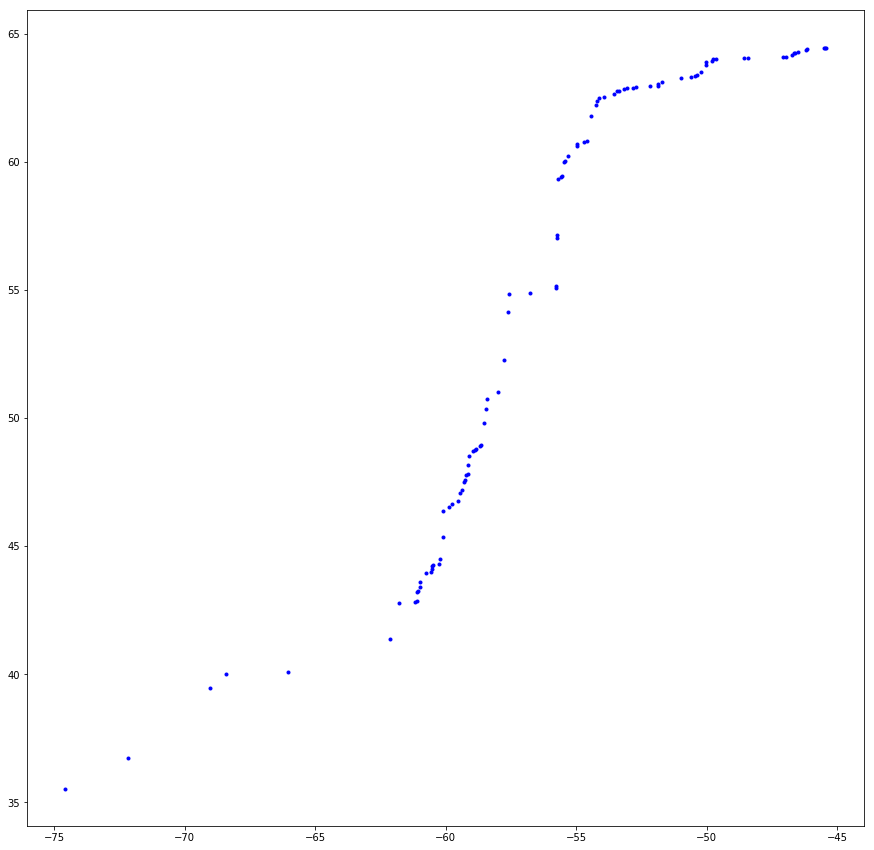

In [140]:
plt.figure(figsize=(15, 15))
plt.scatter(val_lon_list[:99], val_lat_list[:99], marker='.', c='blue')
plt.show()

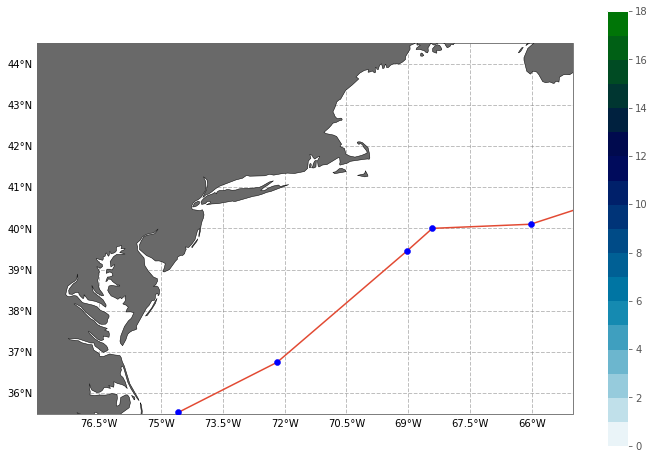

In [1743]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())
ax.set_extent([-78, -65, 35.5, 44.5], ccrs.PlateCarree())



gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.scatter(val_lon_list[:99], val_lat_list[:99], marker='o', c='blue',zorder = 15)
plt.plot(val_lon_list[:99], val_lat_list[:99])

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)

plt.show()